In [86]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pembersihan Data

In [87]:
#Parameter Awal
data_columns = ['Kode Saham', 'Nama Perusahaan', 'Volume', 'Nilai', 'Frekuensi']
data_path = 'data mentah'
files_path = os.listdir(data_path+'/OKTOBER')

#Mengambil dataset saham
df = pd.read_excel(data_path+'/OKTOBER/Ringkasan Saham-20241029.xlsx')
# menghilangkan kolom yang tidak perlu
df = df[data_columns]

In [88]:
#Menampilkan 5 dataset awal
df.head()

,Kode Saham,Nama Perusahaan,Volume,Nilai,Frekuensi
0,AALI,Astra Agro Lestari Tbk.,771400,5213785000,708
1,ABBA,Mahaka Media Tbk.,5224100,159168200,95
2,ABDA,Asuransi Bina Dana Arta Tbk.,0,0,0
3,ABMM,ABM Investama Tbk.,4572900,18011269000,2553
4,ACES,Aspirasi Hidup Indonesia Tbk.,39335400,36202602000,4803


# Pembuatan Model KMeans

In [89]:
#menginisialisasi algoritma KMeans dengan 3 cluster
#Tinggi, Mengengah, dan Rendah
kmeans = KMeans(n_clusters=3)

In [90]:
#Melatih Model menggunakan dataset
kmeans.fit(df[['Volume', 'Nilai', 'Frekuensi']])

KMeans(n_clusters=3)

In [91]:
# mengambil labels
# menambahkan huruf di awal setiap label
labels = list(map(lambda x: 'C'+str(x), kmeans.labels_))

# memasukan label ke dalam dataset
df['Cluster'] = labels

# Visualisasi Data

In [92]:
df.head()

,Kode Saham,Nama Perusahaan,Volume,Nilai,Frekuensi,Cluster
0,AALI,Astra Agro Lestari Tbk.,771400,5213785000,708,C2
1,ABBA,Mahaka Media Tbk.,5224100,159168200,95,C2
2,ABDA,Asuransi Bina Dana Arta Tbk.,0,0,0,C2
3,ABMM,ABM Investama Tbk.,4572900,18011269000,2553,C2
4,ACES,Aspirasi Hidup Indonesia Tbk.,39335400,36202602000,4803,C2


Text(0, 0.5, 'Count')

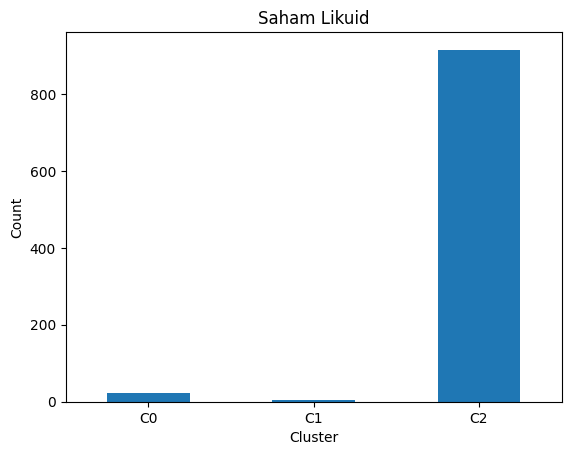

In [94]:
df['Cluster'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('Saham Likuid')
plt.xlabel('Cluster')
plt.ylabel('Count')